# Simple Linear Regression

## Pre Processing

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
##using cars.csv data   ---> which is used for multiple linear regression

dataset = pd.read_csv('cars.csv')

dataset = dataset.drop(columns=['Car_ID'])


X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

print (X)
print (Y)

[['Toyota' 'Corolla' 2018 ... 1498 108 5]
 ['Honda' 'Civic' 2019 ... 1597 140 5]
 ['Ford' 'Mustang' 2017 ... 4951 395 4]
 ...
 ['Ford' 'EcoSport' 2018 ... 1497 121 5]
 ['Hyundai' 'Verna' 2019 ... 1497 113 5]
 ['Tata' 'Altroz' 2020 ... 1199 85 5]]
[ 800000 1000000 2500000  600000  850000  750000  900000  650000 2200000
 2700000 2300000 2000000  850000 1600000  850000  650000 1800000 1900000
 3000000 2500000 1400000  550000  850000  600000 1200000 1600000 3200000
 2800000 2700000 2500000  600000  800000 1300000  700000  750000  500000
 2000000 3500000 4000000  650000 1500000  450000  500000  700000  850000
 1600000 3000000 3200000 2400000 1800000 2700000  550000  500000  700000
  650000 2600000 2800000 2900000 1400000  750000  850000  600000 1200000
 1600000 3200000 2800000 2700000 2500000  600000  800000 1300000  700000
  750000  500000 2000000 3500000 4000000  650000 1500000  450000  500000
  700000  850000 1600000 3000000 3200000 2400000 1800000 2700000  550000
  500000  700000  65000

In [102]:
##encoding the categorial data of independent data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Specify all the columns that you want to transform with OneHotEncoder
cc = ColumnTransformer(transformers=[
    ('encoder_0', OneHotEncoder(), [0]),
    ('encoder_1', OneHotEncoder(), [1]),
    ('encoder_4', OneHotEncoder(), [4]),
    ('encoder_5', OneHotEncoder(), [5]),
    ('encoder_6', OneHotEncoder(), [6])
], remainder='passthrough')

# Apply the transformations
X = cc.fit_transform(X).toarray()


In [103]:
print (X)

[[0.000e+00 0.000e+00 0.000e+00 ... 1.498e+03 1.080e+02 5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.597e+03 1.400e+02 5.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 ... 4.951e+03 3.950e+02 4.000e+00]
 ...
 [0.000e+00 0.000e+00 1.000e+00 ... 1.497e+03 1.210e+02 5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.497e+03 1.130e+02 5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.199e+03 8.500e+01 5.000e+00]]


In [104]:
## encoding the dependent data (categorial)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)

print (Y)

[ 7 10 22  3  8  6  9  4 19 24 20 18  8 15  8  4 16 17 27 22 13  2  8  3
 11 15 28 25 24 22  3  7 12  5  6  1 18 29 30  4 14  0  1  5  8 15 27 28
 21 16 24  2  1  5  4 23 25 26 13  6  8  3 11 15 28 25 24 22  3  7 12  5
  6  1 18 29 30  4 14  0  1  5  8 15 27 28 21 16 24  2  1  5  4 23 25 26
 13  6  8  3]


In [105]:
## splitting the data into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [106]:
print (x_train)

[[0.000e+00 0.000e+00 0.000e+00 ... 1.462e+03 1.030e+02 5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 2.184e+03 1.300e+02 4.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.248e+03 7.400e+01 5.000e+00]
 ...
 [1.000e+00 0.000e+00 0.000e+00 ... 1.984e+03 2.410e+02 5.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 ... 2.998e+03 3.350e+02 5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.498e+03 9.800e+01 7.000e+00]]


In [107]:
print(x_test)

[[1.000e+00 0.000e+00 0.000e+00 ... 1.984e+03 2.410e+02 5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 2.143e+03 1.700e+02 5.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 ... 4.951e+03 3.950e+02 4.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 2.184e+03 1.300e+02 4.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.462e+03 1.030e+02 5.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.968e+03 1.870e+02 5.000e+00]]


In [108]:
print (y_train)

[ 5 11  3  5 15 21  9  3  8 30  8  1  1  3  2 25 27 25 15 18 10  3  1  0
  8  4 17 14 30  6  5  6  7  6 24 24 18  1  3  1 20  7 24 26  0 28 12 27
  8  2 22 22 16  6  8  7 13 25  6  4 15 29  5 27  4 25 13  8 24 12 16 18
  2 15 24 13 22 28 28  8]


In [109]:
print (y_test)

[28 21 22 23 29 23 16  1  4 26  5  4 14 15  4  3  8 11  5 19]


## Applying Simple linear regression

In [110]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [111]:
Y_pred = lr.predict(x_test)

In [112]:
print (Y_pred)

[28.         21.         24.43230901 24.04312404 29.         24.04312404
 14.62031769  1.          3.39916284 26.          5.          3.39916284
 14.         15.39129206  6.25997892  3.          8.56148735 11.
  5.         23.65627088]


In [113]:
xy_table = np.column_stack((y_test, Y_pred))   ##prints as full table
print (xy_table)

[[28.         28.        ]
 [21.         21.        ]
 [22.         24.43230901]
 [23.         24.04312404]
 [29.         29.        ]
 [23.         24.04312404]
 [16.         14.62031769]
 [ 1.          1.        ]
 [ 4.          3.39916284]
 [26.         26.        ]
 [ 5.          5.        ]
 [ 4.          3.39916284]
 [14.         14.        ]
 [15.         15.39129206]
 [ 4.          6.25997892]
 [ 3.          3.        ]
 [ 8.          8.56148735]
 [11.         11.        ]
 [ 5.          5.        ]
 [19.         23.65627088]]


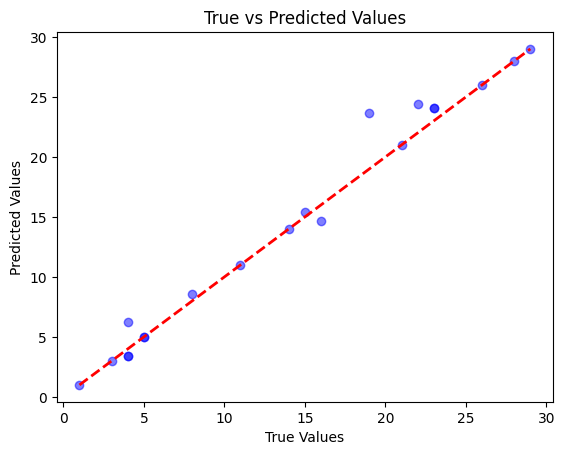

In [114]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()
